In [3]:
import sys
# # This on is a path correcting code, which is used to find the path of qusim.
# sys.path.append('../..')
import qusim.DataPlot.plot_lib as pl
import qusim.Instruments.tools as tools
import qusim.System.transmon_system as qs
import numpy as np
import matplotlib.pyplot as plt
from tqdm import *
from time import *
from sympy import*
from qutip import*

# Some useful tools
# Some intrinsic plotting function


def var_name2str(variable):
    def nested_var_name2str(value):
        if isinstance(value, list):
            return [nested_var_name2str(item) for item in value]
        else:
            for name in globals():
                if eval(name) == value:
                    return name
            return str(value)
    return nested_var_name2str(variable)

# Print the full output
np.set_printoptions(threshold=sys.maxsize)

# auto reload
%load_ext autoreload
%autoreload 2 

In [5]:
def offcut(w1,w2,wcut):     
    ### caculate the detuning off frequency
    x = Symbol('x')
    z = solve((1/(w1-x)+1/(w2-x))/2-1/(w1-wcut))
    z1 = np.abs(z[0]-wcut)
    z2 = np.abs(z[1]-wcut)
    if z1>z2:
        zz = z[1]
    else:
        zz = z[0]
    return zz

In [6]:
N = None  # Maximum excitation level
w_cut = 5.0604 # coupler cutoff frequency when two qubits are on resonance 
w = [4, 5.05887, 4.1]  # Qubit frequency, GHz and sorted by Q0,C0,Q1

w_offcut = float(offcut(w[0],w[2],w_cut))
w[1] = w_offcut

# w = [4, 4.7, 4.1]  # Qubit frequency, GHz and sorted by Q0,C0,Q1
q_dim = [3 for _ in range(len(w))]  # qubit dimension
alpha = [-0.2, -0.15, -0.2]  # Anharmonicity
# cc = 200   # capacitance of C0
# c0 = 70   # capacitance of Q0
# c1 = 72   # capacitance of Q1
# c0c = 4    # capacitance between Q0 and C0
# c1c = 4.2    # capacitance between Q1 and C0"
# c12 = 0.1  # capacitance between Q0 and Q1e# # coupling strength between Q0 and C0
# g0c = 1/2*c0c/np.sqrt(c0*cc)*np.sqrt(w[0]*w[1])
# # coupling strength between Q1 and C0
# g1c = 1/2*c0c/np.sqrt(c0*cc)*np.sqrt(w[2]*w[1])
# g01 = 1/2*(c12/np.sqrt(c0*c1)+c0c*c1c/np.sqrt(c0*c1*cc**2)) * \
#     np.sqrt(w[0]*w[2])  # coupling strength between Q0 and Q1


r_dic = {
    "r12": 0.12,
    "r13": 0.015,
    "r23": 0.12
}

r = tools.r2matrix(r_dic, w)  # Coupling strength
gamma_list = None

_system = qs.qubit_system(N, q_dim, w, alpha, r, gamma_list)

state_010, E_010, index_010 = _system.get_eigenstates_energy((0,1,0))
state_000, E_000, index_000 = _system.get_eigenstates_energy((0,0,0))
state_001, E_001, index_001 = _system.get_eigenstates_energy((0,0,1))
state_100, E_100, index_100 = _system.get_eigenstates_energy((1,0,0))
state_101, E_101, index_101 = _system.get_eigenstates_energy((1,0,1))
state_011, E_011, index_011 = _system.get_eigenstates_energy((0,1,1))
state_110, E_110, index_110 = _system.get_eigenstates_energy((1,1,0))
state_111, E_111, index_111 = _system.get_eigenstates_energy((1,1,1))
state_002, E_002, index_002 = _system.get_eigenstates_energy((0,0,2))
state_200, E_200, index_200 = _system.get_eigenstates_energy((2,0,0))


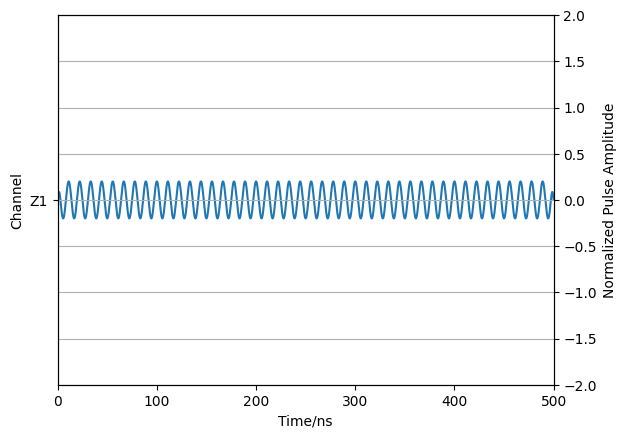

0

In [37]:
simulation_option = {
    "simulation_time": 500, # Unit in ns
    "simulation_step": 5000,
    "initial_state": [state_002,state_002,state_002,state_002,state_002,state_002] # Do multiple simulation
    # "initial_state": [state_001,state_001,state_001,state_001,state_001,state_001] # Do multiple simulation
}
pulse_sequence = [
        {
        'pulse_index': 1,
        'type': "Z", # 'XY' or 'Z'
        'pulse_shape': "cosh", # See PulseGen/pulse_shape.py
        't_delay': 0, # unit in ns
        't_width': 8, # unit in ns
        't_plateau': 492, # unit in ns
        'freq': 0.09, # unit in GHz; Z pulse does not use it
        'pulse_detuning': 0,
        'phase': 0, # unit in rad;
        'amplitude': 0.2, # Z: biased frequency
        'q_index': 1, # 0, 1, 2
        'epsilon': 2
    }
    
]
pl.plot_pulse_sequence(pulse_sequence, simulation_option)

In [38]:
result_list, angle_list = _system.system_dynamics_mesolve(simulation_option, pulse_sequence)   #### mesolve, dont forget!!!!!!!!!!

In [39]:
# state that you want to plot each simulation
interested_state = [[state_001],
                    [state_100],
                    [state_010],
                    [state_101],
                    [state_200],
                    [state_002],``
                    ]
# Convert the variable name to string in order to make legend in the plot
interested_state_label = var_name2str(interested_state)
initial_state_label = var_name2str(simulation_option["initial_state"])

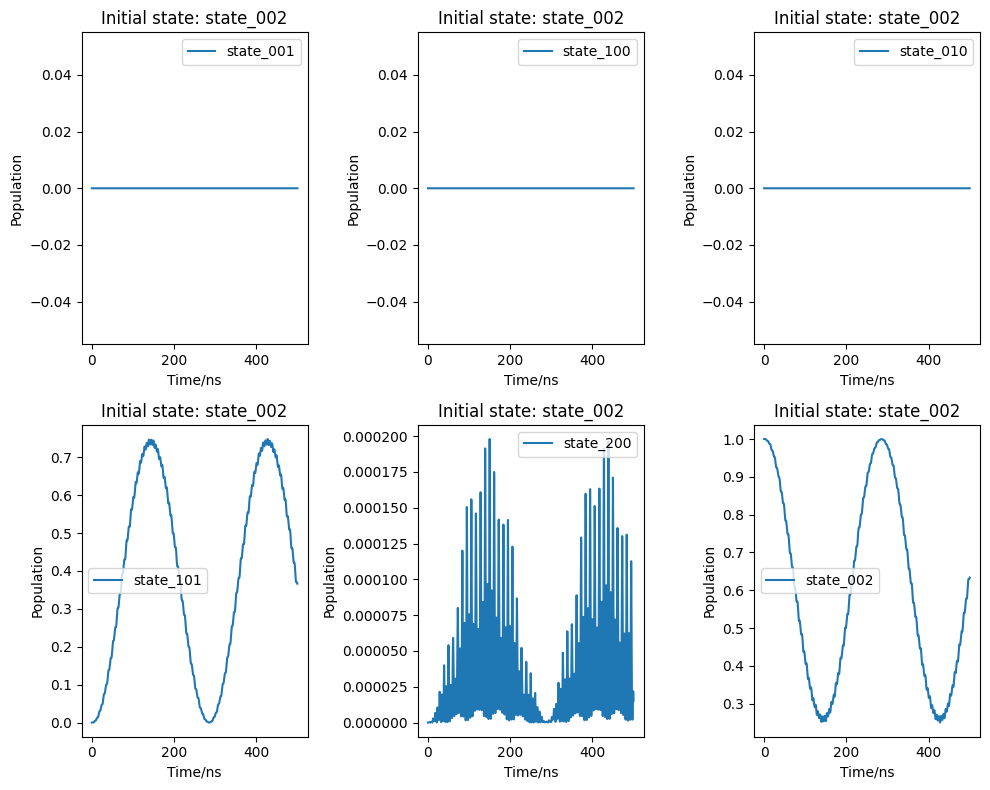

0

In [40]:
# %matplotlib notebook
# plot state population evolution
pl.plot_population_evolution(_system, result_list, simulation_option, interested_state, interested_state_label, initial_state_label)

In [41]:
angle_list

[array([[1.65579562]]),
 array([[1.65579562]]),
 array([[1.65579562]]),
 array([[1.65579562]]),
 array([[1.65579562]]),
 array([[1.65579562]])]